#Step 1: Import Libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import statsmodels.api as sm

plt.style.use('seaborn-darkgrid')

In [72]:
#ignore all warning should they appear
import warnings
warnings.simplefilter('ignore')



---



#Step 2: Import DBS and UOB Stock Prices

- D05.SI represents DBS
- U11.SI represents UOB

##2a) Setting the Start and End Dates

In [73]:
start_date = '2020-01-01'

#if we do not place the end_date, it will automatically choose today's date as the end date.
# or
#we could specify end_date = '2021-12-05'

# or
#we could also specify end_date = 'datetime.date.today()'

# or
#we could work backwards
# start_date = end_date - datetime.timedelta(days=365)
# where we specify an end_date and take 365 days before that
#to specify the start_date

In [74]:
data1 = yf.download('D05.SI',start=start_date)
data2 = yf.download('U11.SI',start=start_date)

#data1 is DBS
#data2 is UOB

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


##2b) Preview the Data

In [75]:
#previewing DBS data
data1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,25.959999,26.120001,25.920000,26.110001,21.991308,2063600
2020-01-03,26.170000,26.320000,25.830000,26.000000,21.898661,4336600
2020-01-06,25.799999,25.930000,25.799999,25.860001,21.780745,5928500
2020-01-07,26.129999,26.190001,25.959999,26.049999,21.940773,8593000
2020-01-08,25.799999,25.840000,25.570000,25.730000,21.671249,14782300
...,...,...,...,...,...,...
2023-07-05,31.370001,31.410000,31.059999,31.209999,31.209999,2766900
2023-07-06,31.040001,31.110001,30.670000,30.709999,30.709999,5589870
2023-07-07,30.730000,30.740000,30.520000,30.670000,30.670000,2957600


In [76]:
#previewing UOB data
data2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,26.480000,26.700001,26.350000,26.680000,23.101862,1584900
2020-01-03,26.750000,26.879999,26.440001,26.629999,23.058567,1638900
2020-01-06,26.459999,26.469999,26.299999,26.370001,22.833437,2343000
2020-01-07,26.410000,26.770000,26.410000,26.700001,23.119183,2442100
2020-01-08,26.600000,26.780001,26.200001,26.719999,23.136499,3022700
...,...,...,...,...,...,...
2023-07-05,27.920000,27.959999,27.799999,27.830000,27.830000,1692900
2023-07-06,27.770000,27.830000,27.510000,27.510000,27.510000,3345449
2023-07-07,27.510000,27.580000,27.400000,27.400000,27.400000,1876900




---



#Step 3: Placing Both Stocks into ONE Dataframe

In [77]:
data  = pd.merge(data1.Close, data2.Close, left_index=True, right_index=True)

#We select only the CLOSE for both
#The left_index=True and right_index=True parameters
#tell pd.merge() to merge the DataFrames by their indexes.

In [78]:
data

,Close_x,Close_y
Date,,
2020-01-02,26.110001,26.680000
2020-01-03,26.000000,26.629999
2020-01-06,25.860001,26.370001
2020-01-07,26.049999,26.700001
2020-01-08,25.730000,26.719999
...,...,...
2023-07-05,31.209999,27.830000
2023-07-06,30.709999,27.510000
2023-07-07,30.670000,27.400000


In [79]:
#we shall rename the columns...

data.rename(columns={'Close_x':'DBS Close Price', 'Close_y':'UOB Close Price'}, inplace=True)
data

#The inplace=True parameter tells the rename() function to update the DataFrame in place.
#we can ignore it....

,DBS Close Price,UOB Close Price
Date,,
2020-01-02,26.110001,26.680000
2020-01-03,26.000000,26.629999
2020-01-06,25.860001,26.370001
2020-01-07,26.049999,26.700001
2020-01-08,25.730000,26.719999
...,...,...
2023-07-05,31.209999,27.830000
2023-07-06,30.709999,27.510000
2023-07-07,30.670000,27.400000




---



#Step 4: Plot

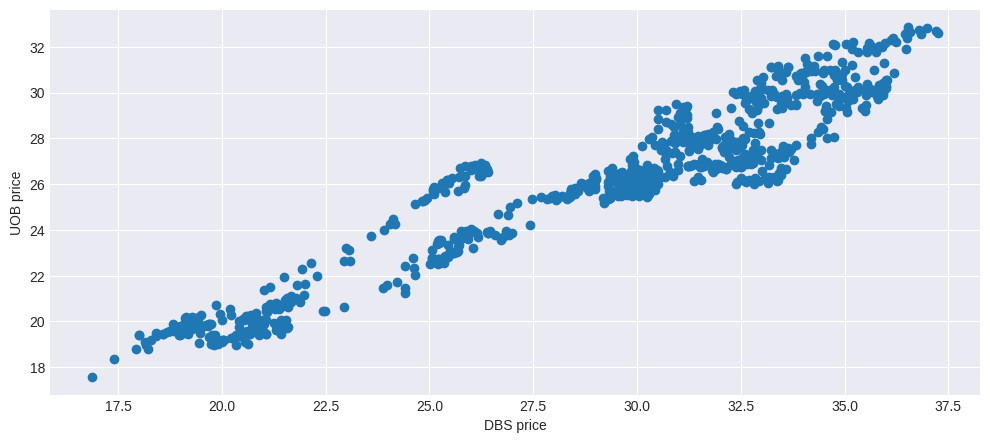

In [80]:
plt.figure(figsize=(12, 5))
plt.scatter(data['DBS Close Price'], data['UOB Close Price'])
plt.xlabel('DBS price' )
plt.ylabel('UOB price' )

plt.show()



---



#Step 5: Formulating the Linear Regression Model

##5a) Assign UOB into y and DBS into X

In [81]:
y = data['UOB Close Price']
X = sm.add_constant(data['DBS Close Price'])

##5b) Train / Fit the LR Model

In [82]:
model = sm.OLS(y,X).fit()

#sm.OLS refers to StatsModel Ordinary Least Square (another term for LR)

In [83]:
model.summary()

#we see that the Adjusted R Squared is already 90% fit...
#this means that the correlation between DBS and UOB is very strong

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        UOB Close Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     8785.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:41:13   Log-Likelihood:                -1336.2
No. Observations:                 885   AIC:                             2676.
Df Residuals:                     883   BIC:                             2686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.2702      0.213     29.430      0.000       5.852       6.688
DBS Close Price     0.6791      0.007     93.731      0.000       0.665       0.693
==============================================================================
Omnibus:                       22.573   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.911
Skew:                           0.402   Prob(JB):                     6.42e-06
Kurtosis:                       2.968   Cond. No.                         170.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##5c) Obtain the Equation of the Line

In [84]:
model.params

#y = 6.27 + 0.68X

const              6.270183
DBS Close Price    0.679141
dtype: float64



---



#Step 6: Final Plot of the Linear Regression Equation

Text(0, 0.5, 'UOB price')

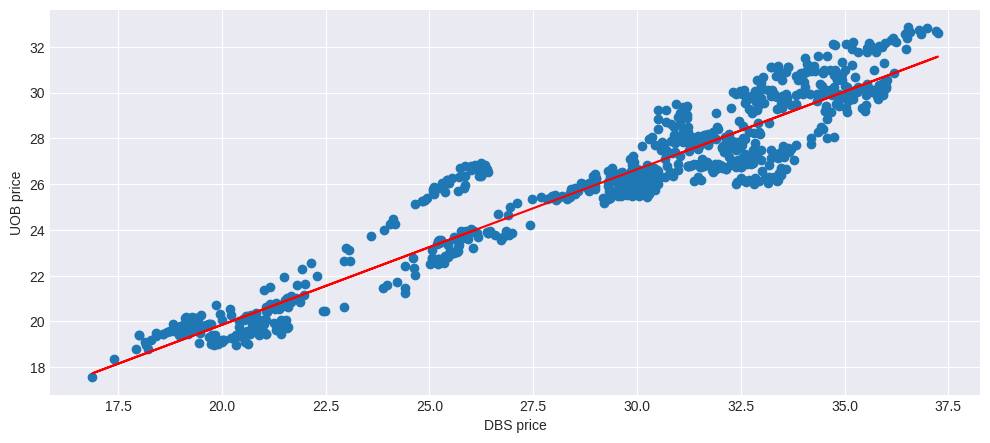

In [85]:
plt.figure(figsize=(12, 5))
plt.scatter(data['DBS Close Price'],data['UOB Close Price'])
plt.plot(data['DBS Close Price'],model.params[0]+model.params[1]*data['DBS Close Price'],color='red')
plt.xlabel('DBS price' )
plt.ylabel('UOB price' )




---
#THE END


---


